## ⚡ Instalación de Dependencias (Ejecutar primero)

Para usar este notebook, necesitas instalar las bibliotecas requeridas. Ejecuta la siguiente celda:

In [17]:
!pip install -q nltk spacy pandas matplotlib seaborn

# Descargar modelo de Spacy
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm", "-q"])

print("✅ Todas las dependencias instaladas correctamente")


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Todas las dependencias instaladas correctamente


## 1. Importar Librerías Necesarias

In [18]:
"""
CONFIGURACIÓN INICIAL: Importación de librerías
================================================
⚠️ IMPORTANTE: Configuración SSL para evitar errores en macOS
En algunos sistemas, NLTK tiene problemas con certificados SSL.
Esta configuración debe hacerse ANTES de cualquier operación con NLTK.
"""

# Configurar SSL PRIMERO (antes de importar NLTK)
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Ahora importar todas las librerías necesarias
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import wordnet
import pandas as pd
import seaborn as sns
from src.utils import path
from tqdm import tqdm
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")
print("✓ Configuración SSL aplicada")

✓ Librerías importadas correctamente
✓ Configuración SSL aplicada


In [19]:
print("Cargando recursos de NLTK ...\n")

# Intentar descargar recursos de NLTK de forma silenciosa
try:
    nltk.data.find('tokenizers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger', quiet=True)

try:
    nltk.data.find('taggers/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

try:
    nltk.data.find('taggers/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

print("✓ Recursos de NLTK listos")
print("\n" + "="*60)
print("¡Listo para comenzar con el POS Tagging!")
print("="*60)

Cargando recursos de NLTK ...

✓ Recursos de NLTK listos

¡Listo para comenzar con el POS Tagging!


## Carga de Corpus

In [33]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\processed\\corpus_canciones.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,Artist,nombre_cancion,letra_cancion,Periodo,Genero
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop


## 2. POS Tagging con NLTK


### Paso 1 Tokenización

In [34]:
def realizar_token(letra):
    sentences = sent_tokenize(letra)
    token = []
    for sent in sentences:
        tokens = word_tokenize(sent)
        token.append(tokens)
    return token
tqdm.pandas(desc="Paso 1 Tokenización")
df['tokens'] = df['letra_cancion'].progress_apply(realizar_token)

Paso 1 Tokenización: 100%|██████████| 5208/5208 [00:06<00:00, 863.59it/s] 


In [35]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"[[thought, i, 'd, end, up, with, sean, but, he..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"[[yeah, breakfast, at, tiffany, 's, and, bottl..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"[[you, you, love, it, how, i, move, you, you, ..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"[[ariana, grande, nicki, minaj, i, 've, been, ..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"[[right, now, i, 'm, in, a, state, of, mind, i..."
...,...,...,...,...,...,...
5203,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"[[it, 's, strange, to, think, the, songs, we, ..."
5204,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"[[drew, looks, at, me, i, fake, a, smile, so, ..."
5205,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"[[to, put, it, plainly, we, just, couldnt, sto..."
5206,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,pop,"[[zwrotka, siedzę, i, patrzę, jak, czytasz, z,..."


### Paso 2 Etiquetado POS

In [36]:
def realizar_taggins(token):
    sentences = token
    analisis = []
    for sent in sentences:
        pos_tags = pos_tag(sent)
        analisis.append(pos_tags)
    return analisis

tqdm.pandas(desc="Paso 2 Etiquetado POS")
df['Etiquetado_POS'] = df['tokens'].progress_apply(realizar_taggins)


Paso 2 Etiquetado POS: 100%|██████████| 5208/5208 [01:57<00:00, 44.39it/s] 


In [37]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"[[thought, i, 'd, end, up, with, sean, but, he...","[[(thought, NN), (i, NN), ('d, MD), (end, VB),..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"[[yeah, breakfast, at, tiffany, 's, and, bottl...","[[(yeah, NN), (breakfast, NN), (at, IN), (tiff..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"[[you, you, love, it, how, i, move, you, you, ...","[[(you, PRP), (you, PRP), (love, VBP), (it, PR..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"[[ariana, grande, nicki, minaj, i, 've, been, ...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"[[right, now, i, 'm, in, a, state, of, mind, i...","[[(right, RB), (now, RB), (i, JJ), ('m, VBP), ..."
...,...,...,...,...,...,...,...
5203,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"[[it, 's, strange, to, think, the, songs, we, ...","[[(it, PRP), ('s, VBZ), (strange, JJ), (to, TO..."
5204,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"[[drew, looks, at, me, i, fake, a, smile, so, ...","[[(drew, NN), (looks, VBZ), (at, IN), (me, PRP..."
5205,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"[[to, put, it, plainly, we, just, couldnt, sto...","[[(to, TO), (put, VB), (it, PRP), (plainly, RB..."
5206,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,pop,"[[zwrotka, siedzę, i, patrzę, jak, czytasz, z,...","[[(zwrotka, NN), (siedzę, NN), (i, NN), (patrz..."


### Paso 3 Borrado de StopWords

In [38]:
stop_words = set(stopwords.words('english'))
def borrado_stopWords(pos_tags_list):
    """Elimina stopwords comunes"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_clean = [(word, tag) for word, tag in sentence_tags
                          if word not in stop_words]
        if sentence_clean:
            resultado.append(sentence_clean)
    return resultado

tqdm.pandas(desc="Paso 3 Borrado de StopWords")
df['StopWords'] = df['Etiquetado_POS'].progress_apply(borrado_stopWords)

Paso 3 Borrado de StopWords: 100%|██████████| 5208/5208 [00:00<00:00, 14795.28it/s]


In [39]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS,StopWords
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"[[thought, i, 'd, end, up, with, sean, but, he...","[[(thought, NN), (i, NN), ('d, MD), (end, VB),...","[[(thought, NN), ('d, MD), (end, VB), (sean, J..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"[[yeah, breakfast, at, tiffany, 's, and, bottl...","[[(yeah, NN), (breakfast, NN), (at, IN), (tiff...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"[[you, you, love, it, how, i, move, you, you, ...","[[(you, PRP), (you, PRP), (love, VBP), (it, PR...","[[(love, VBP), (move, VBP), (love, VBP), (touc..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"[[ariana, grande, nicki, minaj, i, 've, been, ...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"[[right, now, i, 'm, in, a, state, of, mind, i...","[[(right, RB), (now, RB), (i, JJ), ('m, VBP), ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ..."
...,...,...,...,...,...,...,...,...
5203,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"[[it, 's, strange, to, think, the, songs, we, ...","[[(it, PRP), ('s, VBZ), (strange, JJ), (to, TO...","[[('s, VBZ), (strange, JJ), (think, VB), (song..."
5204,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"[[drew, looks, at, me, i, fake, a, smile, so, ...","[[(drew, NN), (looks, VBZ), (at, IN), (me, PRP...","[[(drew, NN), (looks, VBZ), (fake, VBP), (smil..."
5205,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"[[to, put, it, plainly, we, just, couldnt, sto...","[[(to, TO), (put, VB), (it, PRP), (plainly, RB...","[[(put, VB), (plainly, RB), (couldnt, VB), (st..."
5206,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,pop,"[[zwrotka, siedzę, i, patrzę, jak, czytasz, z,...","[[(zwrotka, NN), (siedzę, NN), (i, NN), (patrz...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ..."


### Paso 4 Mayúsculas / minúsculas

In [40]:
def convertir_minusculas(pos_tags_list):
    """Convierte todos los tokens a minúsculas"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_lower = [(word.lower(), tag) for word, tag in sentence_tags]
        resultado.append(sentence_lower)
    return resultado

tqdm.pandas(desc=" Paso 4 Mayúsculas / minúsculas")
df['pos_tags_lower'] = df['StopWords'].progress_apply(convertir_minusculas)

 Paso 4 Mayúsculas / minúsculas: 100%|██████████| 5208/5208 [00:00<00:00, 10095.21it/s]


In [41]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS,StopWords,pos_tags_lower
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"[[thought, i, 'd, end, up, with, sean, but, he...","[[(thought, NN), (i, NN), ('d, MD), (end, VB),...","[[(thought, NN), ('d, MD), (end, VB), (sean, J...","[[(thought, NN), ('d, MD), (end, VB), (sean, J..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"[[yeah, breakfast, at, tiffany, 's, and, bottl...","[[(yeah, NN), (breakfast, NN), (at, IN), (tiff...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"[[you, you, love, it, how, i, move, you, you, ...","[[(you, PRP), (you, PRP), (love, VBP), (it, PR...","[[(love, VBP), (move, VBP), (love, VBP), (touc...","[[(love, VBP), (move, VBP), (love, VBP), (touc..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"[[ariana, grande, nicki, minaj, i, 've, been, ...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"[[right, now, i, 'm, in, a, state, of, mind, i...","[[(right, RB), (now, RB), (i, JJ), ('m, VBP), ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ..."
...,...,...,...,...,...,...,...,...,...
5203,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"[[it, 's, strange, to, think, the, songs, we, ...","[[(it, PRP), ('s, VBZ), (strange, JJ), (to, TO...","[[('s, VBZ), (strange, JJ), (think, VB), (song...","[[('s, VBZ), (strange, JJ), (think, VB), (song..."
5204,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"[[drew, looks, at, me, i, fake, a, smile, so, ...","[[(drew, NN), (looks, VBZ), (at, IN), (me, PRP...","[[(drew, NN), (looks, VBZ), (fake, VBP), (smil...","[[(drew, NN), (looks, VBZ), (fake, VBP), (smil..."
5205,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"[[to, put, it, plainly, we, just, couldnt, sto...","[[(to, TO), (put, VB), (it, PRP), (plainly, RB...","[[(put, VB), (plainly, RB), (couldnt, VB), (st...","[[(put, VB), (plainly, RB), (couldnt, VB), (st..."
5206,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,pop,"[[zwrotka, siedzę, i, patrzę, jak, czytasz, z,...","[[(zwrotka, NN), (siedzę, NN), (i, NN), (patrz...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ..."


### Paso 5 Lematización

In [42]:
lemmatizer = WordNetLemmatizer()

# Mapeo de POS tags de Penn Treebank a WordNet
def get_wordnet_pos(tag):
    """Convierte POS tag de NLTK a formato WordNet"""
    if tag.startswith('J'):
        return 'a'  # Adjetivo
    elif tag.startswith('V'):
        return 'v'  # Verbo
    elif tag.startswith('N'):
        return 'n'  # Sustantivo
    elif tag.startswith('R'):
        return 'r'  # Adverbio
    else:
        return 'n'  # Default: sustantivo

def lematizar(pos_tags_list):
    """Aplica lematización usando POS tags"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_lemma = []
        for word, tag in sentence_tags:
            wordnet_pos = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
            sentence_lemma.append((lemma, tag))
        resultado.append(sentence_lemma)
    return resultado

tqdm.pandas(desc="Paso 5 Lematización")
df['pos_tags_lemma'] = df['pos_tags_lower'].progress_apply(lematizar)

Paso 5 Lematización: 100%|██████████| 5208/5208 [00:11<00:00, 449.07it/s]


In [43]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS,StopWords,pos_tags_lower,pos_tags_lemma
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"[[thought, i, 'd, end, up, with, sean, but, he...","[[(thought, NN), (i, NN), ('d, MD), (end, VB),...","[[(thought, NN), ('d, MD), (end, VB), (sean, J...","[[(thought, NN), ('d, MD), (end, VB), (sean, J...","[[(thought, NN), ('d, MD), (end, VB), (sean, J..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"[[yeah, breakfast, at, tiffany, 's, and, bottl...","[[(yeah, NN), (breakfast, NN), (at, IN), (tiff...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ...","[[(yeah, NN), (breakfast, NN), (tiffany, NN), ..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"[[you, you, love, it, how, i, move, you, you, ...","[[(you, PRP), (you, PRP), (love, VBP), (it, PR...","[[(love, VBP), (move, VBP), (love, VBP), (touc...","[[(love, VBP), (move, VBP), (love, VBP), (touc...","[[(love, VBP), (move, VBP), (love, VBP), (touc..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"[[ariana, grande, nicki, minaj, i, 've, been, ...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi...","[[(ariana, NN), (grande, NN), (nicki, IN), (mi..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"[[right, now, i, 'm, in, a, state, of, mind, i...","[[(right, RB), (now, RB), (i, JJ), ('m, VBP), ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ...","[[(right, RB), ('m, VBP), (state, NN), (mind, ..."
...,...,...,...,...,...,...,...,...,...,...
5203,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"[[it, 's, strange, to, think, the, songs, we, ...","[[(it, PRP), ('s, VBZ), (strange, JJ), (to, TO...","[[('s, VBZ), (strange, JJ), (think, VB), (song...","[[('s, VBZ), (strange, JJ), (think, VB), (song...","[[('s, VBZ), (strange, JJ), (think, VB), (song..."
5204,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"[[drew, looks, at, me, i, fake, a, smile, so, ...","[[(drew, NN), (looks, VBZ), (at, IN), (me, PRP...","[[(drew, NN), (looks, VBZ), (fake, VBP), (smil...","[[(drew, NN), (looks, VBZ), (fake, VBP), (smil...","[[(drew, NN), (look, VBZ), (fake, VBP), (smile..."
5205,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"[[to, put, it, plainly, we, just, couldnt, sto...","[[(to, TO), (put, VB), (it, PRP), (plainly, RB...","[[(put, VB), (plainly, RB), (couldnt, VB), (st...","[[(put, VB), (plainly, RB), (couldnt, VB), (st...","[[(put, VB), (plainly, RB), (couldnt, VB), (st..."
5206,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,pop,"[[zwrotka, siedzę, i, patrzę, jak, czytasz, z,...","[[(zwrotka, NN), (siedzę, NN), (i, NN), (patrz...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ...","[[(zwrotka, NN), (siedzę, NN), (patrzę, VBP), ..."



VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS

Extrayendo POS tags de todas las canciones...
✓ Total de palabras analizadas: 1,227,451
✓ Tipos de POS tags encontrados: 38


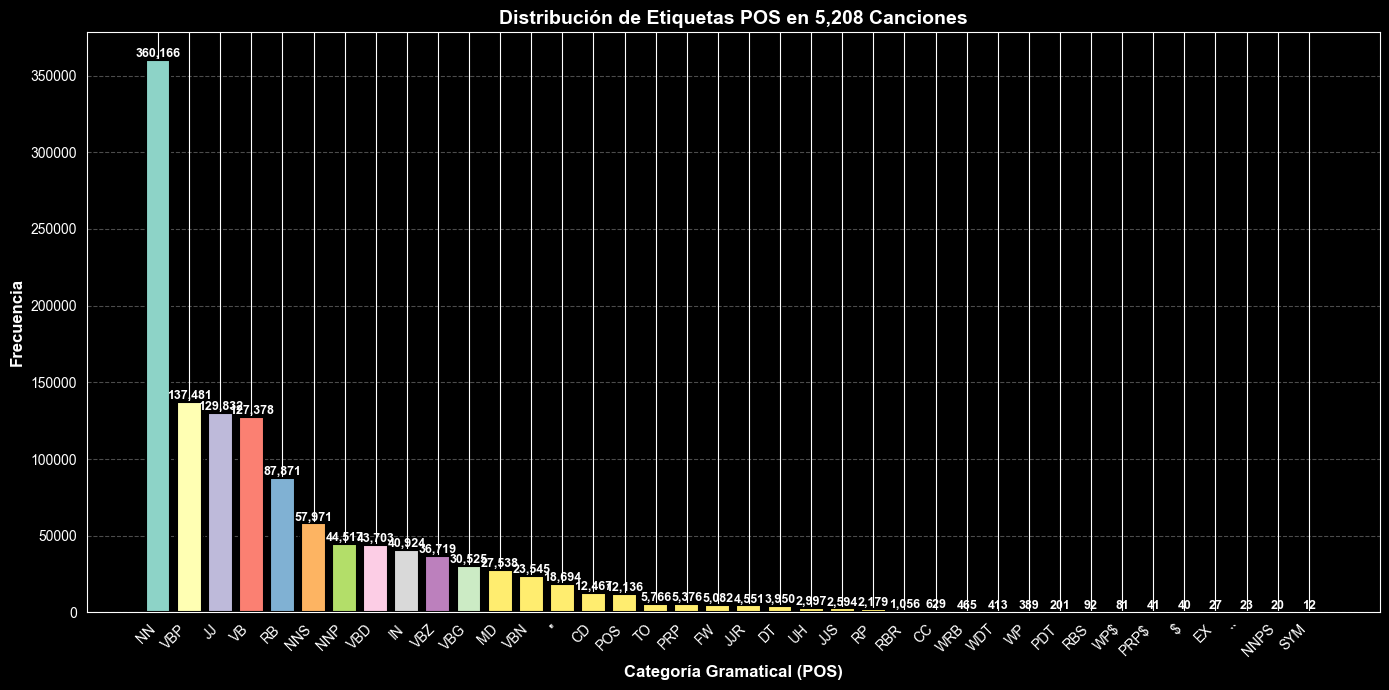


ESTADÍSTICAS DE POS TAGS

 Total de palabras (después de normalización): 1,227,451
 Tipos diferentes de POS tags: 38

 TOP 10 POS TAGS MÁS FRECUENTES:
 1. NN    →  360,166 ocurrencias (29.34%)
 2. VBP   →  137,481 ocurrencias (11.20%)
 3. JJ    →  129,832 ocurrencias (10.58%)
 4. VB    →  127,378 ocurrencias (10.38%)
 5. RB    →   87,871 ocurrencias ( 7.16%)
 6. NNS   →   57,971 ocurrencias ( 4.72%)
 7. NNP   →   44,517 ocurrencias ( 3.63%)
 8. VBD   →   43,703 ocurrencias ( 3.56%)
 9. IN    →   40,924 ocurrencias ( 3.33%)
10. VBZ   →   36,719 ocurrencias ( 2.99%)


In [15]:


# ============================================================================
# VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS
# ============================================================================

print("\n" + "="*80)
print("VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS")
print("="*80 + "\n")

# Recolectar TODOS los POS tags de todas las canciones
def extraer_todos_pos_tags(df, columna_pos='pos_tags_lemma'):
    """Extrae todos los POS tags del DataFrame"""
    todos_tags = []

    for pos_tags_list in df[columna_pos]:
        for sentence_tags in pos_tags_list:
            for word, tag in sentence_tags:
                todos_tags.append(tag)

    return todos_tags

# Extraer todos los tags
print("Extrayendo POS tags de todas las canciones...")
todos_pos_tags = extraer_todos_pos_tags(df, 'pos_tags_lemma')

# Contar frecuencias
pos_counts = Counter(todos_pos_tags)

# Ordenar por frecuencia (mayor a menor)
pos_counts_sorted = dict(sorted(pos_counts.items(), key=lambda x: x[1], reverse=True))

print(f"✓ Total de palabras analizadas: {len(todos_pos_tags):,}")
print(f"✓ Tipos de POS tags encontrados: {len(pos_counts)}")

# Visualización
fig, ax = plt.subplots(figsize=(14, 7))

pos_names = list(pos_counts_sorted.keys())
pos_values = list(pos_counts_sorted.values())

colors = plt.cm.Set3(range(len(pos_names)))
bars = ax.bar(pos_names, pos_values, color=colors, edgecolor='black', linewidth=1.5)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Categoría Gramatical (POS)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title(f'Distribución de Etiquetas POS en {len(df):,} Canciones',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rotar etiquetas si hay muchas
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("\n" + "="*80)
print("ESTADÍSTICAS DE POS TAGS")
print("="*80)
print(f"\n Total de palabras (después de normalización): {len(todos_pos_tags):,}")
print(f" Tipos diferentes de POS tags: {len(pos_counts)}")

print("\n TOP 10 POS TAGS MÁS FRECUENTES:")
for i, (tag, count) in enumerate(list(pos_counts_sorted.items())[:10], 1):
    porcentaje = (count / len(todos_pos_tags)) * 100
    print(f"{i:2}. {tag:5} → {count:8,} ocurrencias ({porcentaje:5.2f}%)")

## Guardar Corpus

In [17]:
df.to_csv(directorio_proyecto+'\\data\\results\\corpus_canciones_nltk.csv', index=False)